In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.decomposition import PCA
try:
  import geopandas as gpd
except:
  !pip install geopandas
  import geopandas as gpd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
root_path = "drive/MyDrive/ML_project"
#root_path = "drive/Sharedwithme/ML_project"
orig = root_path + "/bases_originales"
clean = root_path + "/bases limpias"
GIS = orig + "/GIS"
os.listdir(orig)

['carac_viv.csv',
 'carac_soc.csv',
 'conjunto_de_datos_tb_sec_iii_endireh_2016.csv',
 'rel_pareja_1.csv',
 'rel_pareja_2.csv',
 'toma_dec.csv',
 'roles.csv',
 'TB_SEC_III.dbf',
 'GIS',
 'Documentación INEGI',
 'conjunto_de_datos_tb_sec_vii_2_endireh_2016.csv',
 'economico_mujer.csv',
 'confianza.csv',
 'rol_genero.csv']

###Tree Attempt

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from graphviz import Source
import graphviz

data_base = pd.read_pickle(clean + "/MASTER_ENDIREH2016_coded.pkl")

In [ ]:
#Splitting train and testing
data_base['suffers_violence'] = (data_base['tot_violent'] > 0)
sub_data = data_base.dropna(axis=0)
print(type(sub_data))
train, test = train_test_split(sub_data, test_size=0.2, random_state=0)

features = ['ESTRATO', 'PAREN', 'EDAD', 'P2_5', 'P2_6', 'leer_escribir', 'P2_9', 'P2_10', 
            'P2_11', 'ocup_simple_m', 'P2_16', 'CODIGO', 'num_per_hog', 'num_mujeres_hog', 'mujeres_adultas', 
            'mujeres_no_adultas', 'secundaria_terminada', 'prepa_terminada', 'licenciatura_terminada', 'leer', 
            'num_indigenas', 'num_trabajadoras', 'max_educativo', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 
            'h_secundaria_terminada', 'h_prepa_terminada', 'h_licenciatura_terminada', 'h_leer', 'h_num_indigenas', 'num_trabajadores', 
            'h_max_educativo', 'p_sec_terminada', 'p_prepa_terminada', 'p_licenciatura_terminada', 'p_indigena', 'p_trabaja', 'p_edad', 
            'ocup_simple_h', 'dif_edad', 'P4AB_1', 'P4_1', 'ing_mens_m', 'P4_3', 'ing_mens_h', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'num_per_viv', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0',
            'asset_2_2.0','asset_2_3.0', 'asset_3_0.0', 'asset_3_1.0', 'asset_3_2.0', 'asset_3_3.0', 'asset_4_0.0', 'asset_4_1.0', 'asset_4_2.0',
            'asset_4_3.0', 'asset_5_0.0', 'asset_5_1.0', 'asset_5_2.0',  'asset_5_3.0', 'asset_6_0.0', 'asset_6_1.0',
            'asset_6_2.0', 'asset_6_3.0', 'asset_7_0.0', 'asset_7_1.0', 'asset_7_2.0', 'asset_7_3.0', 'P1_1_1', 'P1_1_2',
            'P1_1_3', 'P1_5_1', 'P1_5_2', 'P1_5_3', 'P1_5_4', 'P1_5_5', 'P1_5_6', 'P1_6_1',
            'P1_6_2', 'P1_6_3', 'P1_6_4', 'P1_6_5', 'P17_1_1_1_1', 'P17_1_1_1_10', 'P17_1_1_1_11', 'P17_1_1_1_12',
            'P17_1_1_1_13', 'P17_1_1_1_14', 'P17_1_1_1_15', 'P17_1_1_1_2', 'P17_1_1_1_3', 'P17_1_1_1_4', 'P17_1_1_1_5', 'P17_1_1_1_6',
            'P17_1_1_1_7', 'P17_1_1_1_8', 'P17_1_1_1_9', 'P17_1_2_1_1', 'P17_1_2_1_10', 'P17_1_2_1_11', 'P17_1_2_1_12', 'P17_1_2_1_13',
            'P17_1_2_1_14', 'P17_1_2_1_15', 'P17_1_2_1_2', 'P17_1_2_1_3', 'P17_1_2_1_4', 'P17_1_2_1_5', 'P17_1_2_1_6', 'P17_1_2_1_7',
            'P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1', 'P17_1_3_1_10', 'P17_1_3_1_11', 'P17_1_3_1_12', 'P17_1_3_1_13', 'P17_1_3_1_14',
            'P17_1_3_1_15', 'P17_1_3_1_2', 'P17_1_3_1_3', 'P17_1_3_1_4', 'P17_1_3_1_5', 'P17_1_3_1_6', 'P17_1_3_1_7', 'P17_1_3_1_8',
            'P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 'P17_1_4_1_11', 'P17_1_4_1_12', 'P17_1_4_1_13', 'P17_1_4_1_14', 'P17_1_4_1_15',
            'P17_1_4_1_2', 'P17_1_4_1_3', 'P17_1_4_1_4', 'P17_1_4_1_5', 'P17_1_4_1_6', 'P17_1_4_1_7', 'P17_1_4_1_8', 'P17_1_4_1_9',
            'P17_1_5_1_1', 'P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15', 'P17_1_5_1_2',
            'P17_1_5_1_3', 'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9', 'P17_1_6_1_1',
            'P17_1_6_1_10', 'P17_1_6_1_11', 'P17_1_6_1_12', 'P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2', 'P17_1_6_1_3',
            'P17_1_6_1_4', 'P17_1_6_1_5', 'P17_1_6_1_6', 'P17_1_6_1_7', 'P17_1_6_1_8', 'P17_1_6_1_9', 'P17_1_7_1_1', 'P17_1_7_1_10',
            'P17_1_7_1_11', 'P17_1_7_1_12', 'P17_1_7_1_13', 'P17_1_7_1_14', 'P17_1_7_1_15', 'P17_1_7_1_2', 'P17_1_7_1_3', 'P17_1_7_1_4',
            'P17_1_7_1_5', 'P17_1_7_1_6', 'P17_1_7_1_7', 'P17_1_7_1_8', 'P17_1_7_1_9', 'P4_6_AB_0.0', 'P4_6_AB_1.0', 'P4_6_AB_3.0',
            'P16_3_1_1_1', 'P16_3_1_1_2', 'P16_3_1_1_3', 'P16_3_1_1_4', 'P16_3_1_1_5', 'P16_3_1_1_6', 'P16_3_2_1_1', 'P16_3_2_1_2',
            'P16_3_2_1_3', 'P16_3_2_1_4', 'P16_3_2_1_5', 'P16_3_2_1_6', 'P16_3_3_1_1', 'P16_3_3_1_2', 'P16_3_3_1_3', 'P16_3_3_1_4',
            'P16_3_3_1_5', 'P16_3_3_1_6', 'P16_3_4_1_1', 'P16_3_4_1_2', 'P16_3_4_1_3', 'P16_3_4_1_4', 'P16_3_4_1_5', 'P16_3_4_1_6',
            'P16_3_5_1_1', 'P16_3_5_1_2', 'P16_3_5_1_3', 'P16_3_5_1_4', 'P16_3_5_1_5', 'P16_3_5_1_6', 'P16_3_6_1_1', 'P16_3_6_1_2',
            'P16_3_6_1_3', 'P16_3_6_1_4', 'P16_3_6_1_5', 'P16_3_6_1_6']

train_features = train[features]
train_target = train[['suffers_violence']]
                    
test_features = test[features]
test_target = test[['suffers_violence']]


#dt = DecisionTreeClassifier(max_depth=10)
#dt.fit(train_features, train_target)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# K-Fold 10
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30], 
              'min_samples_split': [500, 1000]} 
k = 10
dt = DecisionTreeClassifier()
trees = GridSearchCV(dt, parameters, cv=k, scoring=['accuracy', 'precision', 'recall'], refit='accuracy')
# Train the dt
model = trees.fit(train_features, train_target)
#Grid search results to dataframe
results = pd.DataFrame(model.cv_results_)

In [ ]:
results[['mean_test_recall', 'mean_test_accuracy', 'mean_test_precision']]

              precision    recall  f1-score   support

       False       0.64      0.85      0.73      8872
        True       0.53      0.26      0.34      5699

    accuracy                           0.62     14571
   macro avg       0.59      0.56      0.54     14571
weighted avg       0.60      0.62      0.58     14571



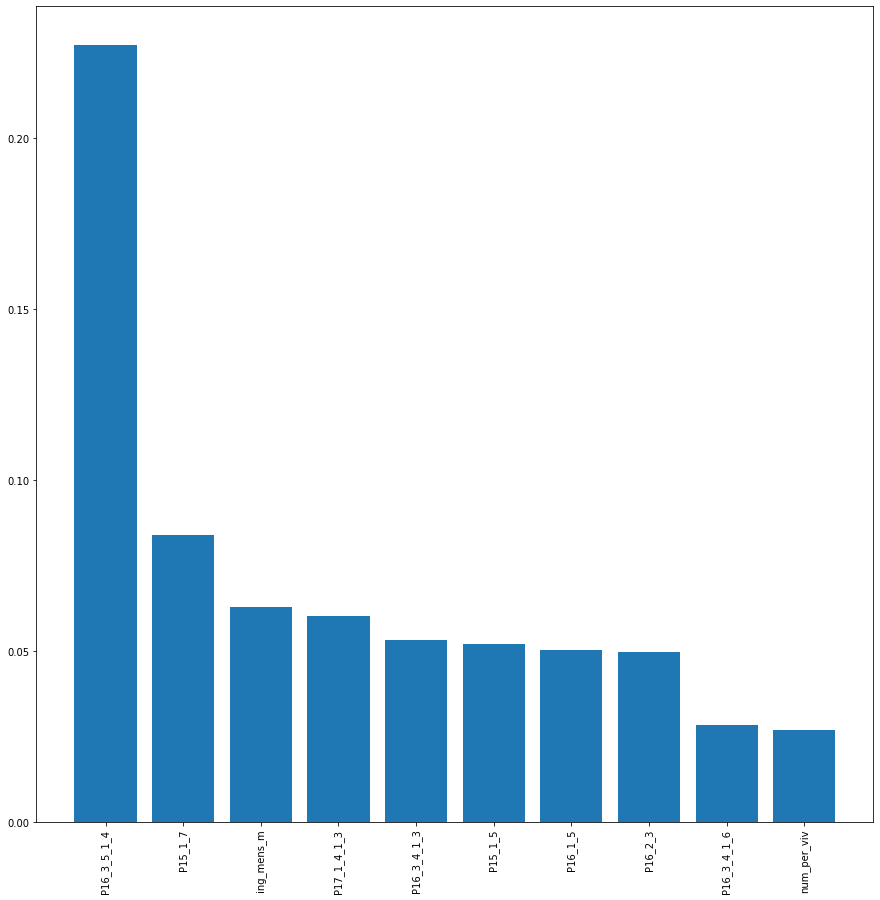

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Get best tree based on highest accuracy
best_tree = model.best_estimator_
predictions = best_tree.predict(test_features)

print(classification_report(test_target, predictions))

# Get importances
importances = best_tree.feature_importances_
# Sort in descending order
indices = np.argsort(importances)[::-1]
# Sort the labels in a corresponding fashion
labels = train_features.columns.values
names = [labels[i] for i in indices]

# Plot
plt.figure(figsize=(15, 15))
plt.bar(range(train_features[names[:10]].shape[1]),importances[indices[:10]])
plt.xticks(range(train_features[names[:10]].shape[1]), names[:10], rotation=90)
plt.show()

In [ ]:
test_target_pred = test_target.reset_index().join(predicted_prob["prob1"])

In [ ]:
test_target_pred["suffers_violence"] = test_target_pred["suffers_violence"].replace(True, 1)

In [ ]:
test_target_pred

,index,suffers_violence,prob1
0,95172,1.0,0.425612
1,50610,0.0,0.363813
2,36652,0.0,0.288396
3,54203,0.0,0.425363
4,28706,1.0,0.651238
...,...,...,...
14566,15690,0.0,0.288396
14567,78309,1.0,0.216409
14568,88364,0.0,0.428195
14569,60818,0.0,0.323661


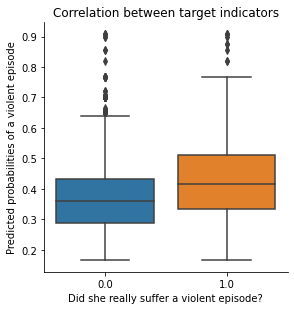

In [ ]:
ax1 = sns.catplot(x="suffers_violence", y="prob1", kind="box", dodge=False, data=test_target_pred,
            height=4)
ax1.set(xlabel='Did she really suffer a violent episode?', ylabel='Predicted probabilities of a violent episode',
        title = "Correlation between target indicators")


In [ ]:
2#Graph tree
from IPython.display import Image
#Select tree with highest accuracy from cv_results_
#best_tree = model.best_estimator_

#Graph
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=features))
graph.format = 'png'
graph.render('first_tree_render',view=True)
Image('first_tree_render')

NotFittedError: ignored

### 2. DBSCAN

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_clusters = AgglomerativeClustering().fit(data_base[features])
agg_clusters.labels_